<img style="float: left; margin: 30px 15px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/db/Logo_ITESO_normal.jpg" width="300" height="500" /> 
    
    
### Simulación de procesos financieros. 

**Nombres:** 

Estudiante 1: Héctor Josué Falomir Patrón 

Estudiante 2: Andres Martines Covarrubias.

**Fecha:** 04 de marzo del 2024.

**Expediente** : `[7530461, ######]`
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/hectorfalomir/ProyectoConjunto_HJFalomir_AMartinez

# Tarea 5: Clase 10

> ## Tarea 5:

Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:

1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

Estudiante 1

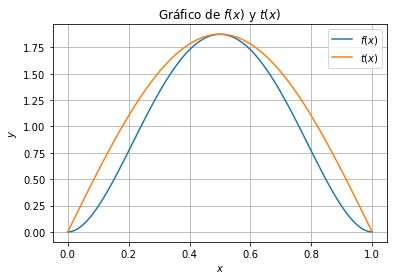

In [64]:
# Solución estudiante 1
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Definir la función f(x)*-1
def f(x):
    return -1*(30*(x**2 - 2*x**3 + x**4))

# Definir la función t(x)
def t(x, a):
    return a * np.sin(np.pi * x)

# Máximo de la función
result = -(minimize(f, x0=0.5).fun)

# Rango de valores de x para graficar
x_values = np.linspace(0, 1, 100)

# Calcular los valores de t(x) con el valor óptimo de 'a'
t_values = t(x_values, result)

# Graficar f(x) y t(x)
plt.plot(x_values, f_values, label='$f(x)$')
plt.plot(x_values, t_values, label='$t(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.title('Gráfico de $f(x)$ y $t(x)$')
plt.grid(True)
plt.show()

Estudiante 2

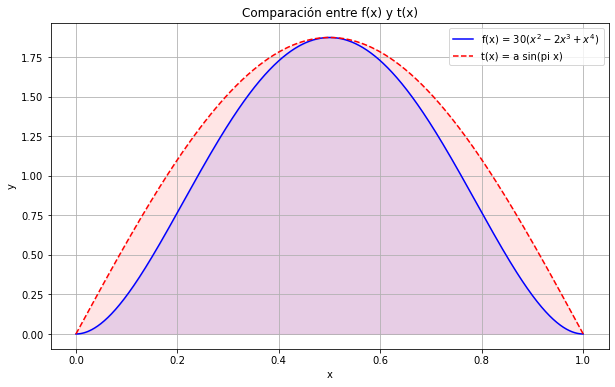

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función f(x)
def f(x):
    return 30 * (x**2 - 2*x**3 + x**4)

# Encontrar el máximo de f(x) en el intervalo [0, 1]
x = np.linspace(0, 1, 1000)
y = f(x)
a = max(y)

# Definir la función t(x) con el valor de a encontrado
def t(x):
    return a * np.sin(np.pi * x)

# Graficar ambas funciones para comparar
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'f(x) = 30($x^2 - 2x^3 + x^4$)', color='blue')
plt.plot(x, t(x), label='t(x) = a sin(pi x)', linestyle='--', color='red')
plt.fill_between(x, y, color='blue', alpha=0.1)
plt.fill_between(x, t(x), color='red', alpha=0.1)
plt.title('Comparación entre f(x) y t(x)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

Estudiante 1

$f(x)=30(x^2-2x^3+x^4)$

$t(x)=a \sin(\pi x)$

Tomemos
$$c=\int_{-\infty}^{\infty}t(x)\geq 1$$

Definamos la función $g(x)=t(x)/c \rightarrow g(x)$ **es una densidad**. Resultando entonces 
$$\frac{f(x)}{g(x)}\leq c,\quad \forall x$$

$$\int _0^1a\cdot \sin \left(\pi \cdot \:x\right) = \frac{2a}{\pi }$$

$$ PDF = g(x) = \frac{\pi \sin \left(\pi x\right)}{2}$$

$$CDF = \int_{- \inf}^{x} g(x)dx =  \frac{1}{2}\left(-\cos \left(\pi x\right)+1\right)$$

Estudiante 2

In [89]:
from sympy import symbols, sin, pi, integrate

# Definir la variable simbólica x
x_sym = symbols('x')

# Recordatorio: 'a' es el máximo de f(x), ya calculado previamente.
# Definir t(x) simbólicamente utilizando el valor de 'a' encontrado
t_sym = a * sin(pi * x_sym)

# Calcular la integral de t(x) en el intervalo [0, 1]
integral_t = integrate(t_sym, (x_sym, 0, 1))

# Mostrar el resultado de la integral
print(f"Integral de t(x) en el intervalo [0, 1]: {integral_t}")

# La función de densidad g(x) será t(x) normalizada por esta integral
g_sym = t_sym / integral_t

# Mostrar la función de densidad g(x)
print(f"Función de densidad g(x): {g_sym.simplify()}")

Integral de t(x) en el intervalo [0, 1]: 3.74999248498123/pi
Función de densidad g(x): 0.5*pi*sin(pi*x)


3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

Estudiante 1

La función de distribución acumulada (CDF) de $g(x)$ es:

$
\text{CDF} = \frac{1}{2} \left( -\cos(\pi x) + 1 \right)
$

La inversa de la CDF es:

$
x = \frac{1}{\pi} \arccos(1 - 2u)
$

donde \( u \) es un número aleatorio uniformemente distribuido entre 0 y 1. Este es el procedimiento para generar variables aleatorias que siguen la distribución $g(x)$.


Estudiante 2

Función de distribución acumulada G(x): 0.5 - 0.5*cos(pi*x)
Inversa de G(x), G^{-1}(u): [2.0 - 0.318309886183791*acos(1.0 - 2.0*u), 0.318309886183791*acos(1.0 - 2.0*u)]


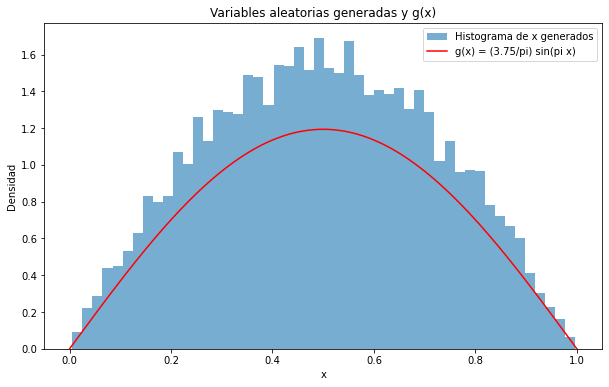

In [90]:
# Calcular la función de distribución acumulada G(x) integrando g(x) desde 0 hasta x
G_sym = integrate(g_sym, (x_sym, 0, x_sym))

# Simplificar G(x)
G_simplified = G_sym.simplify()

# Mostrar G(x) simplificada
print(f"Función de distribución acumulada G(x): {G_simplified}")

from sympy import solve, cos, Eq

# Definir u como una variable simbólica para representar una variable aleatoria uniforme
u = symbols('u')

# Resolver G(x) = u para x, obteniendo la función inversa G^{-1}(u)
x_inverse_solution = solve(Eq(G_simplified, u), x_sym)

# Mostrar la solución inversa
print(f"Inversa de G(x), G^{{-1}}(u): {x_inverse_solution}")

# Generar variables aleatorias u uniformemente distribuidas entre 0 y 1
np.random.seed(0)  # Para reproducibilidad
u_random = np.random.uniform(0, 1, 10000)

# Utilizar la función inversa G^{-1}(u) para generar variables aleatorias x que sigan la distribución g(x)
x_random = 1 / np.pi * np.arccos(1 - 2 * u_random)

import numpy as np
import matplotlib.pyplot as plt

# Generar variables aleatorias u uniformemente distribuidas entre 0 y 1
np.random.seed(0)  # Para reproducibilidad
u_random = np.random.uniform(0, 1, 10000)

# Utilizar la función inversa G^{-1}(u) para generar variables aleatorias x que sigan la distribución g(x)
x_random = 1 / np.pi * np.arccos(1 - 2 * u_random)

# Graficar el histograma de los puntos generados y la función de densidad g(x) para comparar
plt.figure(figsize=(10, 6))
plt.hist(x_random, bins=50, density=True, alpha=0.6, label='Histograma de x generados')
x_vals = np.linspace(0, 1, 1000)
g_vals = (3.75/np.pi) * np.sin(np.pi * x_vals)
plt.plot(x_vals, g_vals, 'r-', label='g(x) = (3.75/pi) sin(pi x)')
plt.title('Variables aleatorias generadas y g(x)')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.show()

4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
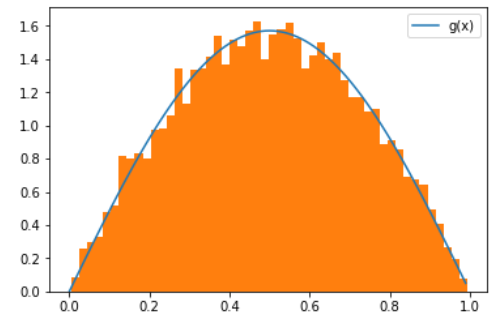

Estudiante 1

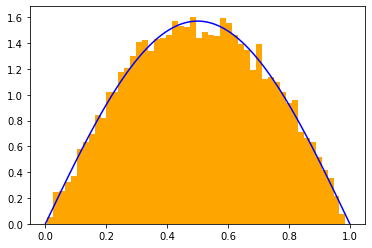

In [57]:
# Solución estudiante 1
def g(x):
    return (np.pi * np.sin(np.pi * x))/2

def inversa_g(u):
    return (1/np.pi)*np.arccos(1-(2*u))

u = np.random.uniform(0, 1, 10000)

x = np.linspace(0,1,100)

plt.hist(inversa_g(u), bins=50, color='orange', density=True)
plt.plot(x, g(x), 'b')
plt.show()

Estudiante 2

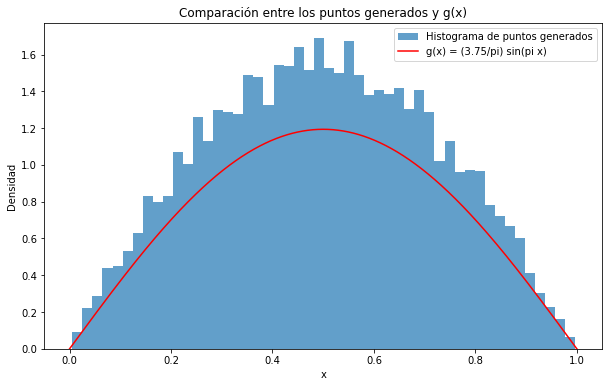

In [91]:
# Definir g(x) para el gráfico
def g(x):
    return (3.75/np.pi) * np.sin(np.pi * x)

# Generar valores de x para el gráfico de g(x)
x_values = np.linspace(0, 1, 1000)
g_values = g(x_values)

# Graficar el histograma de los puntos generados
plt.figure(figsize=(10, 6))
plt.hist(x_random, bins=50, density=True, alpha=0.7, label='Histograma de puntos generados')

# Graficar g(x)
plt.plot(x_values, g_values, color='red', label='g(x) = (3.75/pi) sin(pi x)')
plt.title('Comparación entre los puntos generados y g(x)')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.show()

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
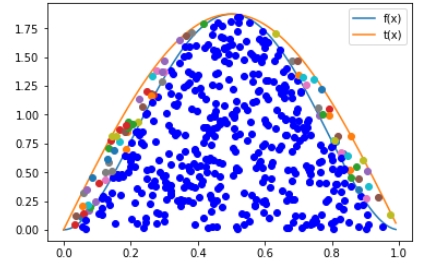

Estudiante 1

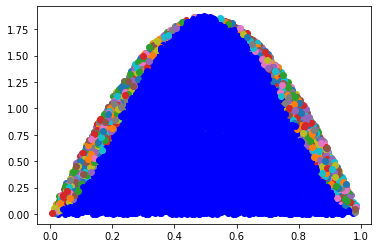

In [80]:
# Solución estudiante 1
def Acep_rechazo2(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    for i in range(len(R1)):
        if condition[i]:
            plt.plot(R1[i],R2[i]*t_x[i],'ob')
        else:
            plt.plot(R1[i],R2[i]*t_x[i],'o')
    plt.show()

a = result
R2 = np.random.uniform(0, 1, 10000)
R1 = inversa_g(u)
def f(x):
    return 30*(x**2 - 2*x**3 + x**4)
def t(x):
    return a * np.sin(np.pi * x)

Acep_rechazo2(R2, R1, f, t)

Estudiante 2

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

Estudiante 1

El máximo de f es: 0.5


c:\Users\hecto\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


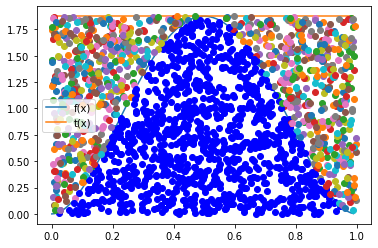

In [81]:
# Solución estudiante 1
t = lambda x: a * np.ones(len(x))

# Rango donde se graficará las funciones
x = np.arange(0, 1, 0.01)
print('El máximo de f es:',max_f)

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 2000 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.uniform(0, 1, N)

# Prueba de función creada
Acep_rechazo2(R2, R1, f, t)

Estudiante 2

In [92]:
np.random.seed(0)  # Para reproducibilidad

# Inicializar una lista para almacenar los puntos aceptados con t(x) constante
puntos_aceptados_constante = []

# Total de puntos generados
total_puntos = 0

while len(puntos_aceptados_constante) < 500:
    u = np.random.uniform(0, 1)
    v = np.random.uniform(0, a)
    total_puntos += 1  # Incrementar el total de puntos generados
    
    # Aceptar u si v es menor o igual que f(u) / a
    if v <= f(u) / a:
        puntos_aceptados_constante.append(u)

# Calcular el porcentaje de aceptación para t(x) constante
porcentaje_aceptacion_constante = len(puntos_aceptados_constante) / total_puntos * 100

# Imprimir el porcentaje de aceptación
print(f"Porcentaje de aceptación con t(x) constante: {porcentaje_aceptacion_constante}%")

Porcentaje de aceptación con t(x) constante: 27.870680044593087%


7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

Estudiante 1

El máximo de f es: [2.109375]


c:\Users\hecto\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


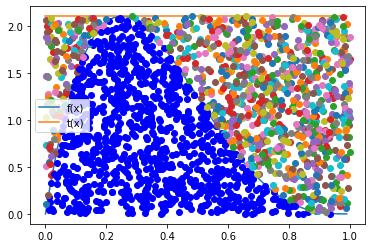

In [82]:
# Solución estudiante 1
from scipy import optimize

f = lambda x: 20*x*(1-x)**3

a = f(optimize.fmin(lambda x:-f(x), 0, disp=False))

t = lambda x: a * np.ones(len(x))

# Rango donde se graficará las funciones
x = np.arange(0, 1, 0.01)
print('El máximo de f es:',a)

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 2000 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.uniform(0, 1, N)

# Prueba de función creada
Acep_rechazo2(R2, R1, f, t)

Estudiante 2


8. Demostrar la validez de la siguiente ecuación
$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i$$

Estudiante 1

$$P_{i+1} = \binom{n}{i+1} P^{x+1} (1-P)^{n-(x+1)}$$

$$= \frac{P}{1-P} \frac{n-x}{x+1} \binom{n}{x} P^{x} (1-P)^{n-x}$$

$$=\frac{P}{1-P} \frac{n-x}{x+1} P(x)$$

Estudiante 2

Para demostrar la relación $ p_{i+1} = \frac{n-i}{i+1} \cdot \frac{p}{1-p} \cdot p_i $, comenzamos con la expresión de $p_i$ y mostramos cómo se puede transformar en la expresión de $p_{i+1}$.

1. La fórmula para $p_i$ es:
$$ p_i = \frac{n!}{i!(n-i)!}p^i(1-p)^{n-i} $$

2. Expresamos $p_{i+1}$ en términos de $p_i$:
$$ p_{i+1} = \frac{n!}{(i+1)!(n-i-1)!}p^{i+1}(1-p)^{n-i-1} $$

3. Al dividir $p_{i+1}$ por $p_i$, obtenemos:
$$ \frac{p_{i+1}}{p_i} = \frac{\frac{n!}{(i+1)!(n-i-1)!}p^{i+1}(1-p)^{n-i-1}}{\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}} $$

4. Simplificando esta expresión, encontramos que:
$$ \frac{p_{i+1}}{p_i} = \frac{n-i}{i+1} \cdot \frac{p}{1-p} $$

Esto demuestra que para calcular $p_{i+1}$ a partir de $p_i$, podemos usar la relación:
$$ p_{i+1} = \frac{n-i}{i+1} \cdot \frac{p}{1-p} \cdot p_i $$

Esta relación permite calcular las probabilidades binomiales de manera recursiva, mejorando la eficiencia computacional al evitar cálculos de factoriales y potencias para cada término.


9. Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    

Demuestre matemáticamente que 
 $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
 y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.
> **Ayuda**: $
\begin{aligned}
\frac{p_{k+1}}{p_k}& = \frac{e^{-\lambda}(\lambda)^k}{k!} \\
& = \frac{e^{-\lambda}(\lambda)^k}{k!}
\end{aligned}
$

Estudiante 1

Para demostrar la relación $$P(k+1) = \frac{\lambda}{k+1} P(k),$$ primero evaluamos $P(k+1)$ y $P(k)$:

$$P(k+1) = \frac{e^{-\lambda}\lambda^{k+1}}{(k+1)!},$$
$$P(k) = \frac{e^{-\lambda}\lambda^k}{k!}$$

Ahora, dividimos $P(k+1)$ por $P(k)$:

$$\frac{P(k+1)}{P(k)} = \frac{\frac{e^{-\lambda}\lambda^{k+1}}{(k+1)!}}{\frac{e^{-\lambda}\lambda^k}{k!}}$$

Simplificamos:

$$\frac{P(k+1)}{P(k)} = \frac{e^{-\lambda}\lambda^{k+1}}{(k+1)!} \times \frac{k!}{e^{-\lambda}\lambda^k}.$$

$$= \frac{e^{-\lambda}\lambda^{k+1}}{e^{-\lambda}\lambda^k} \times \frac{k!}{(k+1)!}.$$

$$= \lambda \times \frac{k!}{(k+1)!}.$$

$$= \frac{\lambda}{k+1}.$$

Por lo tanto, hemos demostrado matemáticamente que $$P(k+1) = \frac{\lambda}{k+1} P(k).$$

Ahora, para generar variables aleatorias distribuidas Poisson utilizando el método de la transformada inversa, primero necesitamos calcular la función de distribución acumulativa (CDF) de la distribución Poisson, que es:

$$F(k) = \sum_{i=0}^{k} \frac{e^{-\lambda}\lambda^i}{i!}.$$

Luego, invertimos esta función de distribución acumulativa y generamos valores aleatorios uniformemente distribuidos $U$ entre 0 y 1. La inversa de la función de distribución acumulativa nos dará valores aleatorios Poisson. Es decir, encontramos el valor de $k$ tal que $F(k) \geq U$.

In [84]:
# Solución estudiante 1
def poisson_inverse_transform(lambd, n):
    # Generate random numbers U
    U = np.random.uniform(0, 1, n)
    poisson_values = []
    
    for u in U:
        k = 0
        cumulative_prob = np.exp(-lambd)
        while u >= cumulative_prob:
            k += 1
            cumulative_prob += (lambd * cumulative_prob) / k
        poisson_values.append(k)
    
    return poisson_values

# Ejemplo de uso
lambd = 3.0  # Parámetro lambda
n = 10  # Número de muestras a generar

poisson_samples = poisson_inverse_transform(lambd, n)
print("Muestras Poisson generadas:", poisson_samples)


Muestras Poisson generadas: [0, 3, 2, 3, 3, 2, 0, 3, 1, 0]


Estudiante 2

## Demostración

Partimos de la expresión de la PMF de Poisson:
$$ P(k, \lambda) = \frac{e^{-\lambda} \lambda^k}{k!} $$

Para encontrar $P(k+1, \lambda)$, sustituimos $k$ por $k+1$:
$$ P(k+1, \lambda) = \frac{e^{-\lambda} \lambda^{k+1}}{(k+1)!} $$

Simplificamos la expresión dividiendo $P(k+1, \lambda)$ entre $P(k, \lambda)$:
$$ \frac{P(k+1, \lambda)}{P(k, \lambda)} = \frac{\frac{e^{-\lambda} \lambda^{k+1}}{(k+1)!}}{\frac{e^{-\lambda} \lambda^k}{k!}} = \frac{\lambda}{k+1} $$

Esto demuestra que la relación entre $P(k+1, \lambda)$ y $P(k, \lambda)$ es:
$$ P(k+1, \lambda) = \frac{\lambda}{k+1} P(k, \lambda) $$

Esta relación permite calcular los valores de la PMF de Poisson de manera recursiva, empezando desde $P(0, \lambda) = e^{-\lambda}$ y usando la relación para calcular $P(k+1, \lambda)$ a partir de $P(k, \lambda)$, mejorando la eficiencia del cálculo.

## Conclusión

La ventaja de esta relación recursiva es que simplifica el cálculo de la PMF de Poisson para valores sucesivos de $k$, evitando la necesidad de calcular factoriales y potencias elevadas para cada valor de $k$. Esto es especialmente útil en la generación de variables aleatorias Poisson mediante métodos computacionales.